In [1]:
#Importing
import pandas as pd
import numpy as np
import os
import math
from scipy import ndimage
from Potato import plotparams
import matplotlib.pyplot as plt

In [2]:
#Defining the read_lightcurve function. This function reads data files and imports them
def read_lightcurve(asas_sn_id, guide = 'known_dipper_lightcurves/'):
    """
    Input: 
        asas_sn_id: the asassn id of the desired star
        guide: the path to the data file of the desired star

    Output: 
        dfv: This is the dataframe for the V-band data of the star
        dfg: This is the dataframe for the g-band data of the star
    
    This function reads the data of the desired star by going to the corresponding file and copying the data of that file onto 
    a data frame. This data frame is then sorted into two data frames by comparing the value in the Photo filter column. If the
    Photo filter column data has a value of one, its row is sorted into the data frame corresponding to the V-band. If the Photo
    filter column data has a value of zero, it gets sorted into the data frame corresponding to the g-band.
    """
    fname = os.path.join(guide, str(asas_sn_id)+'.dat')

    dfv = pd.DataFrame()
    dfg = pd.DataFrame()

    fdata = pd.read_fwf(fname, header=None)
    fdata.columns = ["JD", "Mag", "Mag_err", "Quality", "Cam_number", "Phot_filter", "Camera"] #These are the columns of data

    dfv = fdata.loc[fdata["Phot_filter"] == 1].reset_index(drop=True) #This sorts the data into the V-band
    dfg = fdata.loc[fdata["Phot_filter"] == 0].reset_index(drop=True) #This sorts the data into the g-band

    return dfv, dfg
#End of read_lightcurve function

In [3]:
def absolutemag_wextinct(mag,dist,dust):
    '''
    '''
    M = mag + 5 - (5*math.log10(dist)) - dust

    return M

In [4]:
def dist_werr(plx,plx_e):
    ''' 
    '''
    dist = 1000/plx
    
    dist_err = np.sqrt(((-1000/(plx**2))**2)*(plx_e**2))

    return dist, dist_err

In [5]:
colors = ["#6b8bcd", "#b3b540", "#8f62ca", "#5eb550", "#c75d9c", "#4bb092", "#c5562f", "#6c7f39", 
              "#ce5761", "#c68c45", '#b5b246', '#d77fcc', '#7362cf', '#ce443f', '#3fc1bf', '#cda735',
              '#a1b055']

In [6]:
#This is to read my csv files
Gaia0 = pd.read_csv('Paper_Writing_Stuff/Index0_GaiaX')
Gaia1 = pd.read_csv('Paper_Writing_Stuff/Index1_GaiaX')
Dipper = pd.read_csv('Paper_Writing_Stuff/DippersXGaia.csv')

#Extinciton files
Ext13_13_5 = pd.read_csv('Paper_Writing_Stuff/index_13_13.5_subset.csv')
Ext13_5_14 = pd.read_csv('Paper_Writing_Stuff/index_13.5_14_subset.csv')
ExtDip = pd.read_csv('Paper_Writing_Stuff/DippersXGaia_extinctions.csv')

/var/folders/tg/9q1zz56d7qs4655vs65rm14m0000gn/T/ipykernel_96761/1980904646.py:2: DtypeWarning: Columns (6,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  Gaia0 = pd.read_csv('Paper_Writing_Stuff/Index0_GaiaX')
/var/folders/tg/9q1zz56d7qs4655vs65rm14m0000gn/T/ipykernel_96761/1980904646.py:3: DtypeWarning: Columns (6,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  Gaia1 = pd.read_csv('Paper_Writing_Stuff/Index1_GaiaX')


In [7]:
#Removing bad (negative) parallaxes
good_plx0 = Gaia0.loc[Gaia0['plx'] > 0].reset_index(drop=True)

good_plx1 = Gaia1.loc[Gaia1['plx'] > 0].reset_index(drop=True)

good_plxD = Dipper.loc[Dipper['Plx'] > 0].reset_index(drop=True)

In [8]:
#Checking the errors
good_plx0['plx_e_plx'] = good_plx0['plx'] / good_plx0['e_Plx']
gplx0 = good_plx0[good_plx0['plx_e_plx'] > 10].reset_index(drop=True)

good_plx1['plx_e_plx'] = good_plx1['plx'] / good_plx1['e_Plx']
gplx1 = good_plx1[good_plx1['plx_e_plx'] > 10].reset_index(drop=True)

good_plxD['plx_e_plx'] = good_plxD['Plx'] / good_plxD['e_Plx']
gplxD = good_plxD

In [9]:
#Finding the corresponding Extinction
Ext13ID0 = gplx0['asas_sn_id']
Ext13_0 = pd.DataFrame()
for i in Ext13ID0:
    row = Ext13_13_5.loc[Ext13_13_5['asas_sn_id'] == i].reset_index(drop=True)
    Ext13_0 = pd.concat([Ext13_0,row]).reset_index(drop=True)

Ext14ID0 = gplx0['asas_sn_id']
Ext14_0 = pd.DataFrame()
for i in Ext14ID0:
    row = Ext13_5_14.loc[Ext13_5_14['asas_sn_id'] == i].reset_index(drop=True)
    Ext14_0 = pd.concat([Ext14_0,row]).reset_index(drop=True)

Ext0 = pd.concat([Ext13_0,Ext14_0])


Ext13ID1 = gplx1['asas_sn_id']
Ext13_1 = pd.DataFrame()
for i in Ext13ID1:
    row = Ext13_13_5.loc[Ext13_13_5['asas_sn_id'] == i].reset_index(drop=True)
    Ext13_1 = pd.concat([Ext13_1,row]).reset_index(drop=True)

Ext14ID1 = gplx1['asas_sn_id']
Ext14_1 = pd.DataFrame()
for i in Ext14ID1:
    row = Ext13_5_14.loc[Ext13_5_14['asas_sn_id'] == i].reset_index(drop=True)
    Ext14_1 = pd.concat([Ext14_1,row]).reset_index(drop=True)

Ext1 = pd.concat([Ext13_1,Ext14_1])

ExtIDDip = gplxD['Asas-sn-id']
ExtDip_D = pd.DataFrame()
for i in ExtIDDip:
    row = ExtDip.loc[ExtDip['asas_sn_id'] == i].reset_index(drop=True)
    ExtDip_D = pd.concat([ExtDip_D,row]).reset_index(drop=True)

In [10]:
#Add the extinction to dataframes
AID130 = Ext0['asas_sn_id']
gp0 = gplx0['asas_sn_id']
df0 = pd.DataFrame()
for i in AID130:
    row = gplx0.loc[gplx0['asas_sn_id'] == i].reset_index(drop=True)
    df0 = pd.concat([df0,row]).reset_index(drop=True)
df0E = df0.merge(Ext0[['mwdust_av','mwdust_ag','mwdust_abp','mwdust_arp','asas_sn_id']], on='asas_sn_id',how='left')


AID131 = Ext1['asas_sn_id']
gp1 = gplx1['asas_sn_id']
df1 = pd.DataFrame()
for i in AID131:
    row = gplx1.loc[gplx1['asas_sn_id'] == i].reset_index(drop=True)
    df1 = pd.concat([df1,row]).reset_index(drop=True)
df1E = df1.merge(Ext1[['mwdust_av','mwdust_ag','mwdust_abp','mwdust_arp','asas_sn_id']], on='asas_sn_id',how='left')


ExtDip_D.rename(columns={'asas_sn_id':'Asas-sn-id'}, inplace=True)
AID13D = ExtDip_D['Asas-sn-id']
gpD = gplxD['Asas-sn-id']
dfD = pd.DataFrame()
for i in AID13D:
    row = gplxD.loc[gplxD['Asas-sn-id'] == i].reset_index(drop=True)
    dfD = pd.concat([dfD,row]).reset_index(drop=True)
dfDE = dfD.merge(ExtDip_D[['mwdust_av','mwdust_ag','mwdust_abp','mwdust_arp','Asas-sn-id']], on='Asas-sn-id',how='left')

In [11]:
#Distances
dist0 = 1000 / df0E['plx']

dist1 = 1000 / df1E['plx']

In [12]:
mag0 = df0E['Gmag']
Mag0 = [absolutemag_wextinct(mag0[i],dist0[i],df0E.mwdust_ag[i]) for i in range(len(mag0))]

mag1 = df1E['Gmag']
Mag1 = [absolutemag_wextinct(mag1[i],dist1[i],df1E.mwdust_ag[i]) for i in range(len(mag1))]

In [13]:
bp0 = df0E['BPmag']
rp0 = df0E['RPmag']
BP0 = [absolutemag_wextinct(bp0[i],dist0[i],df0E.mwdust_abp[i]) for i in range(len(mag0))]
RP0 = [absolutemag_wextinct(rp0[i],dist0[i],df0E.mwdust_arp[i]) for i in range(len(mag0))]
bprp0 = [x - y for x, y in zip(BP0,RP0)]

bp1 = df1E['BPmag']
rp1 = df1E['RPmag']
BP1 = [absolutemag_wextinct(bp1[i],dist1[i],df1E.mwdust_abp[i]) for i in range(len(mag1))]
RP1 = [absolutemag_wextinct(rp1[i],dist1[i],df1E.mwdust_arp[i]) for i in range(len(mag1))]
bprp1 = [x - y for x, y in zip(BP1,RP1)]

In [14]:
New_Mag = []
New_Color = []

Known_Mag = []
Known_Color = []

Known_SDE_Mag = []
Known_SDE_Color = []

Known_MDE_Mag = []
Known_MDE_Color = []

Known_Dipper_Mag = []
Known_Dipper_Color = []

New_SDE_Mag = []
New_SDE_Color = []

New_MDE_Mag = []
New_MDE_Color = []

New_Dipper_Mag = []
New_Dipper_Color = []

In [15]:
J0607v, J0607g = read_lightcurve(377958261591, 'Updated_LC_data/')
J0607g['Mag'].astype(float)
J0607g['JD'].astype(float)
J0607df = dfDE.loc[dfDE['Asas-sn-id'] == 377958261591].reset_index(drop=True)

mag_G_J0607 = float(J0607df.Gmag[0])
dist_J0607, dist_err_J0607 = dist_werr(float(J0607df.Plx[0]),float(J0607df.e_Plx[0]))
dust_g_J0607 = float(J0607df.mwdust_ag[0])

Mag_J0607 = absolutemag_wextinct(mag_G_J0607, dist_J0607, dust_g_J0607)
New_Mag.append(Mag_J0607)

mag_bp_J0607 = float(J0607df.BPmag[0])
dust_bp_J0607 = float(J0607df.mwdust_abp[0])

bp_J0607 = absolutemag_wextinct(mag_bp_J0607, dist_J0607, dust_bp_J0607)

mag_rp_J0607 = float(J0607df.RPmag[0])
dust_rp_J0607 = float(J0607df.mwdust_arp[0])

rp_J0607 = absolutemag_wextinct(mag_rp_J0607, dist_J0607, dust_rp_J0607)

bprp_J0607 = bp_J0607-rp_J0607
New_Color.append(bprp_J0607)

New_SDE_Mag.append(Mag_J0607)
New_SDE_Color.append(bprp_J0607)

print('Mean g Mag:', np.mean(J0607g.Mag))
print('Parallax:', float(J0607df.Plx[0]))
print('Dust:', dust_g_J0607)
print('Distance:', dist_J0607, '+/-', dist_err_J0607)
print('Absolute Mag:', Mag_J0607)
print('Color:', bprp_J0607)

Mean g Mag: 13.678420947296837
Parallax: 0.514
Dust: 0.9734050345934632
Distance: 1945.5252918287938 +/- 66.9957153022756
Absolute Mag: 0.12274856038291537
Color: 1.1729356637679313


In [16]:
J0727v, J0727g = read_lightcurve(438086977939, 'Updated_LC_data/')
J0727g['Mag'].astype(float)
J0727g['JD'].astype(float)
J0727df = dfDE.loc[dfDE['Asas-sn-id'] == 438086977939].reset_index(drop=True)

mag_G_J0727 = float(J0727df.Gmag[0])
dist_J0727, dist_err_J0727 = dist_werr(float(J0727df.Plx[0]),float(J0727df.e_Plx[0]))
dust_g_J0727 = float(J0727df.mwdust_ag[0])

Mag_J0727 = absolutemag_wextinct(mag_G_J0727, dist_J0727, dust_g_J0727)
New_Mag.append(Mag_J0727)

mag_bp_J0727 = float(J0727df.BPmag[0])
dust_bp_J0727 = float(J0727df.mwdust_abp[0])

bp_J0727 = absolutemag_wextinct(mag_bp_J0727, dist_J0727, dust_bp_J0727)

mag_rp_J0727 = float(J0727df.RPmag[0])
dust_rp_J0727 = float(J0727df.mwdust_arp[0])

rp_J0727 = absolutemag_wextinct(mag_rp_J0727, dist_J0727, dust_rp_J0727)

bprp_J0727 = bp_J0727-rp_J0727
New_Color.append(bprp_J0727)

New_SDE_Mag.append(Mag_J0727)
New_SDE_Color.append(bprp_J0727)

print('Mean g Mag:', np.mean(J0727g.Mag))
print('Parallax:', float(J0727df.Plx[0]))
print('Dust:', dust_g_J0727)
print('Distance:', dist_J0727, '+/-', dist_err_J0727)
print('Absolute Mag:', Mag_J0727)
print('Color:', bprp_J0727)

Mean g Mag: 13.003355180695847
Parallax: 0.1936
Dust: 1.388489629999397
Distance: 5165.289256198347 +/- 360.182876852674
Absolute Mag: -2.8269518651375223
Color: 1.520831710786121


In [17]:
J0716v, J0716g = read_lightcurve(360777377116, 'Updated_LC_data/')
J0716g = J0716g.loc[J0716g['Mag'] < 13.75].reset_index(drop=True)
J0716g['Mag'].astype(float)
J0716g['JD'].astype(float)
J0716df = dfDE.loc[dfDE['Asas-sn-id'] == 360777377116].reset_index(drop=True)

mag_G_J0716 = float(J0716df.Gmag[0])
dist_J0716, dist_err_J0716 = dist_werr(float(J0716df.Plx[0]),float(J0716df.e_Plx[0]))
dust_g_J0716 = float(J0716df.mwdust_ag[0])

Mag_J0716 = absolutemag_wextinct(mag_G_J0716, dist_J0716, dust_g_J0716)
New_Mag.append(Mag_J0716)

mag_bp_J0716 = float(J0716df.BPmag[0])
dust_bp_J0716 = float(J0716df.mwdust_abp[0])

bp_J0716 = absolutemag_wextinct(mag_bp_J0716, dist_J0716, dust_bp_J0716)

mag_rp_J0716 = float(J0716df.RPmag[0])
dust_rp_J0716 = float(J0716df.mwdust_arp[0])

rp_J0716 = absolutemag_wextinct(mag_rp_J0716, dist_J0716, dust_rp_J0716)

bprp_J0716 = bp_J0716-rp_J0716
New_Color.append(bprp_J0716)

New_SDE_Mag.append(Mag_J0716)
New_SDE_Color.append(bprp_J0716)

print('Mean g Mag:', np.mean(J0716g.Mag))
print('Parallax:', float(J0716df.Plx[0]))
print('Dust:', dust_g_J0716)
print('Distance:', dist_J0716, '+/-', dist_err_J0716)
print('Absolute Mag:', Mag_J0716)
print('Color:', bprp_J0716)

Mean g Mag: 13.095289487341772
Parallax: 0.0742
Dust: 0.7617952472063899
Distance: 13477.08894878706 +/- 5830.384841725939
Absolute Mag: -3.790513720811255
Color: 0.6663412571657288


In [18]:
J0954v, J0954g = read_lightcurve(635655234580, 'Updated_LC_data/')
J0954g['Mag'].astype(float)
J0954g['JD'].astype(float)
J0954df = dfDE.loc[dfDE['Asas-sn-id'] == 635655234580].reset_index(drop=True)

mag_G_J0954 = float(J0954df.Gmag[0])
dist_J0954, dist_err_J0954 = dist_werr(float(J0954df.Plx[0]),float(J0954df.e_Plx[0]))
dust_g_J0954 = float(J0954df.mwdust_ag[0])

Mag_J0954 = absolutemag_wextinct(mag_G_J0954, dist_J0954, dust_g_J0954)
New_Mag.append(Mag_J0954)

mag_bp_J0954 = float(J0954df.BPmag[0])
dust_bp_J0954 = float(J0954df.mwdust_abp[0])

bp_J0954 = absolutemag_wextinct(mag_bp_J0954, dist_J0954, dust_bp_J0954)

mag_rp_J0954 = float(J0954df.RPmag[0])
dust_rp_J0954 = float(J0954df.mwdust_arp[0])

rp_J0954 = absolutemag_wextinct(mag_rp_J0954, dist_J0954, dust_rp_J0954)

bprp_J0954 = bp_J0954-rp_J0954
New_Color.append(bprp_J0954)

New_SDE_Mag.append(Mag_J0954)
New_SDE_Color.append(bprp_J0954)

print('Mean g Mag:', np.mean(J0954g.Mag))
print('Parallax:', float(J0954df.Plx[0]))
print('Dust:', dust_g_J0954)
print('Distance:', dist_J0954, '+/-', dist_err_J0954)
print('Absolute Mag:', Mag_J0954)
print('Color:', bprp_J0954)

Mean g Mag: 13.064609819721117
Parallax: 0.5657
Dust: 0.880368865514007
Distance: 1767.7214071062401 +/- 40.93539054815582
Absolute Mag: 0.75525902818804
Color: 0.28419920474361804


In [19]:
J1644v, J1644g = read_lightcurve(412317159120, 'Updated_LC_data/')
J1644g['Mag'].astype(float)
J1644g['JD'].astype(float)
J1644df = dfDE.loc[dfDE['Asas-sn-id'] == 412317159120].reset_index(drop=True)

mag_G_J1644 = float(J1644df.Gmag[0])
dist_J1644, dist_err_J1644 = dist_werr(float(J1644df.Plx[0]),float(J1644df.e_Plx[0]))
dust_g_J1644 = float(J1644df.mwdust_ag[0])

Mag_J1644 = absolutemag_wextinct(mag_G_J1644, dist_J1644, dust_g_J1644)
New_Mag.append(Mag_J1644)

mag_bp_J1644 = float(J1644df.BPmag[0])
dust_bp_J1644 = float(J1644df.mwdust_abp[0])

bp_J1644 = absolutemag_wextinct(mag_bp_J1644, dist_J1644, dust_bp_J1644)

mag_rp_J1644 = float(J1644df.RPmag[0])
dust_rp_J1644 = float(J1644df.mwdust_arp[0])

rp_J1644 = absolutemag_wextinct(mag_rp_J1644, dist_J1644, dust_rp_J1644)

bprp_J1644 = bp_J1644-rp_J1644
New_Color.append(bprp_J1644)

New_SDE_Mag.append(Mag_J1644)
New_SDE_Color.append(bprp_J1644)

print('Mean g Mag:', np.mean(J1644g.Mag))
print('Parallax:', float(J1644df.Plx[0]))
print('Dust:', dust_g_J1644)
print('Distance:', dist_J1644, '+/-', dist_err_J1644)
print('Absolute Mag:', Mag_J1644)
print('Color:', bprp_J1644)

Mean g Mag: 13.957465171353828
Parallax: 0.5514
Dust: 1.2669542704994716
Distance: 1813.5654697134567 +/- 54.26882526346036
Absolute Mag: 0.07741553834930337
Color: 1.249701078940077


In [20]:
J1817v, J1817g = read_lightcurve(317827964025, 'Updated_LC_data/')
J1817g['Mag'].astype(float)
J1817g['JD'].astype(float)
J1817df = dfDE.loc[dfDE['Asas-sn-id'] == 317827964025].reset_index(drop=True)

mag_G_J1817 = float(J1817df.Gmag[0])
dist_J1817, dist_err_J1817 = dist_werr(float(J1817df.Plx[0]),float(J1817df.e_Plx[0]))
dust_g_J1817 = float(J1817df.mwdust_ag[0])

Mag_J1817 = absolutemag_wextinct(mag_G_J1817, dist_J1817, dust_g_J1817)
New_Mag.append(Mag_J1817)

mag_bp_J1817 = float(J1817df.BPmag[0])
dust_bp_J1817 = float(J1817df.mwdust_abp[0])

bp_J1817 = absolutemag_wextinct(mag_bp_J1817, dist_J1817, dust_bp_J1817)

mag_rp_J1817 = float(J1817df.RPmag[0])
dust_rp_J1817 = float(J1817df.mwdust_arp[0])

rp_J1817 = absolutemag_wextinct(mag_rp_J1817, dist_J1817, dust_rp_J1817)

bprp_J1817 = bp_J1817-rp_J1817
New_Color.append(bprp_J1817)

New_SDE_Mag.append(Mag_J1817)
New_SDE_Color.append(bprp_J1817)

print('Mean g Mag:', np.mean(J1817g.Mag))
print('Parallax:', float(J1817df.Plx[0]))
print('Dust:', dust_g_J1817)
print('Distance:', dist_J1817, '+/-', dist_err_J1817)
print('Absolute Mag:', Mag_J1817)
print('Color:', bprp_J1817)

Mean g Mag: 12.721932321003964
Parallax: 0.4638
Dust: 1.2215191352727228
Distance: 2156.1017680034497 +/- 137.13885760263426
Absolute Mag: -2.0110434137628816
Color: 2.2682059824237824


In [21]:
J1831v, J1831g = read_lightcurve(438086901547, 'Updated_LC_data/')
J1831g = J1831g.loc[J1831g['Mag'] < 14.5].reset_index(drop=True)
J1831g['Mag'].astype(float)
J1831g['JD'].astype(float)
J1831df = dfDE.loc[dfDE['Asas-sn-id'] == 438086901547].reset_index(drop=True)

mag_G_J1831 = float(J1831df.Gmag[0])
dist_J1831, dist_err_J1831 = dist_werr(float(J1831df.Plx[0]),float(J1831df.e_Plx[0]))
dust_g_J1831 = float(J1831df.mwdust_ag[0])

Mag_J1831 = absolutemag_wextinct(mag_G_J1831, dist_J1831, dust_g_J1831)
New_Mag.append(Mag_J1831)

mag_bp_J1831 = float(J1831df.BPmag[0])
dust_bp_J1831 = float(J1831df.mwdust_abp[0])

bp_J1831 = absolutemag_wextinct(mag_bp_J1831, dist_J1831, dust_bp_J1831)

mag_rp_J1831 = float(J1831df.RPmag[0])
dust_rp_J1831 = float(J1831df.mwdust_arp[0])

rp_J1831 = absolutemag_wextinct(mag_rp_J1831, dist_J1831, dust_rp_J1831)

bprp_J1831 = bp_J1831-rp_J1831
New_Color.append(bprp_J1831)

New_SDE_Mag.append(Mag_J1831)
New_SDE_Color.append(bprp_J1831)

print('Mean g Mag:', np.mean(J1831g.Mag))
print('Parallax:', float(J1831df.Plx[0]))
print('Dust:', dust_g_J1831)
print('Distance:', dist_J1831, '+/-', dist_err_J1831)
print('Absolute Mag:', Mag_J1831)
print('Color:', bprp_J1831)

Mean g Mag: 13.863221746556475
Parallax: 0.1369
Dust: 0.3620576810313853
Distance: 7304.601899196494 +/- 1013.7869692091556
Absolute Mag: -2.159983440361434
Color: 1.7664748475716603


In [22]:
J1919v, J1919g = read_lightcurve(515396514761, 'Updated_LC_data/')
J1919g['Mag'].astype(float)
J1919g['JD'].astype(float)
J1919df = dfDE.loc[dfDE['Asas-sn-id'] == 515396514761].reset_index(drop=True)

mag_G_J1919 = float(J1919df.Gmag[0])
dist_J1919, dist_err_J1919 = dist_werr(float(J1919df.Plx[0]),float(J1919df.e_Plx[0]))
dust_g_J1919 = float(J1919df.mwdust_ag[0])

Mag_J1919 = absolutemag_wextinct(mag_G_J1919, dist_J1919, dust_g_J1919)
New_Mag.append(Mag_J1919)

mag_bp_J1919 = float(J1919df.BPmag[0])
dust_bp_J1919 = float(J1919df.mwdust_abp[0])

bp_J1919 = absolutemag_wextinct(mag_bp_J1919, dist_J1919, dust_bp_J1919)

mag_rp_J1919 = float(J1919df.RPmag[0])
dust_rp_J1919 = float(J1919df.mwdust_arp[0])

rp_J1919 = absolutemag_wextinct(mag_rp_J1919, dist_J1919, dust_rp_J1919)

bprp_J1919 = bp_J1919-rp_J1919
New_Color.append(bprp_J1919)

New_SDE_Mag.append(Mag_J1919)
New_SDE_Color.append(bprp_J1919)

print('Mean g Mag:', np.mean(J1919g.Mag))
print('Parallax:', float(J1919df.Plx[0]))
print('Dust:', dust_g_J1919)
print('Distance:', dist_J1919, '+/-', dist_err_J1919)
print('Absolute Mag:', Mag_J1919)
print('Color:', bprp_J1919)

Mean g Mag: 13.60842742972973
Parallax: 0.3352
Dust: 0.4443805661257803
Distance: 2983.2935560859187 +/- 115.70052574318896
Absolute Mag: -0.48199651633458324
Color: 1.512492147262427


In [23]:
J2071v, J2071g = read_lightcurve(463856535113, 'Updated_LC_data/')
J2071g['Mag'].astype(float)
J2071g['JD'].astype(float)
J2071df = dfDE.loc[dfDE['Asas-sn-id'] == 463856535113].reset_index(drop=True)

mag_G_J2071 = float(J2071df.Gmag[0])
dist_J2071, dist_err_J2071 = dist_werr(float(J2071df.Plx[0]),float(J2071df.e_Plx[0]))
dust_g_J2071 = float(J2071df.mwdust_ag[0])

Mag_J2071 = absolutemag_wextinct(mag_G_J2071, dist_J2071, dust_g_J2071)
New_Mag.append(Mag_J2071)

mag_bp_J2071 = float(J2071df.BPmag[0])
dust_bp_J2071 = float(J2071df.mwdust_abp[0])

bp_J2071 = absolutemag_wextinct(mag_bp_J2071, dist_J2071, dust_bp_J2071)

mag_rp_J2071 = float(J2071df.RPmag[0])
dust_rp_J2071 = float(J2071df.mwdust_arp[0])

rp_J2071 = absolutemag_wextinct(mag_rp_J2071, dist_J2071, dust_rp_J2071)

bprp_J2071 = bp_J2071-rp_J2071
New_Color.append(bprp_J2071)

New_SDE_Mag.append(Mag_J2071)
New_SDE_Color.append(bprp_J2071)

print('Mean g Mag:', np.mean(J2071g.Mag))
print('Parallax:', float(J2071df.Plx[0]))
print('Dust:', dust_g_J2071)
print('Distance:', dist_J2071, '+/-', dist_err_J2071)
print('Absolute Mag:', Mag_J2071)
print('Color:', bprp_J2071)

Mean g Mag: 13.410036849840258
Parallax: 0.7846
Dust: 0.1123873884441364
Distance: 1274.534794799898 +/- 28.265237610907757
Absolute Mag: 2.3439061305234494
Color: 0.8226591135267114


In [24]:
J2148v, J2148g = read_lightcurve(120259184943, 'Updated_LC_data/')
J2148g['Mag'].astype(float)
J2148g['JD'].astype(float)
J2148df = dfDE.loc[dfDE['Asas-sn-id'] == 120259184943].reset_index(drop=True)

mag_G_J2148 = float(J2148df.Gmag[0])
dist_J2148, dist_err_J2148 = dist_werr(float(J2148df.Plx[0]),float(J2148df.e_Plx[0]))
dust_g_J2148 = float(J2148df.mwdust_ag[0])

Mag_J2148 = absolutemag_wextinct(mag_G_J2148, dist_J2148, dust_g_J2148)
New_Mag.append(Mag_J2148)

mag_bp_J2148 = float(J2148df.BPmag[0])
dust_bp_J2148 = float(J2148df.mwdust_abp[0])

bp_J2148 = absolutemag_wextinct(mag_bp_J2148, dist_J2148, dust_bp_J2148)

mag_rp_J2148 = float(J2148df.RPmag[0])
dust_rp_J2148 = float(J2148df.mwdust_arp[0])

rp_J2148 = absolutemag_wextinct(mag_rp_J2148, dist_J2148, dust_rp_J2148)

bprp_J2148 = bp_J2148-rp_J2148
New_Color.append(bprp_J2148)

New_SDE_Mag.append(Mag_J2148)
New_SDE_Color.append(bprp_J2148)

print('Mean g Mag:', np.mean(J2148g.Mag))
print('Parallax:', float(J2148df.Plx[0]))
print('Dust:', dust_g_J2148)
print('Distance:', dist_J2148, '+/-', dist_err_J2148)
print('Absolute Mag:', Mag_J2148)
print('Color:', bprp_J2148)

Mean g Mag: 13.147454148387098
Parallax: 0.6188
Dust: 1.211569681169422
Distance: 1616.0310277957337 +/- 76.77975471427693
Absolute Mag: -1.6596731560327722
Color: 2.1928389983232313


In [25]:
J225623v, J225623g = read_lightcurve(25770019815, 'Updated_LC_data/')
J225623g['Mag'].astype(float)
J225623g['JD'].astype(float)
J225623df = dfDE.loc[dfDE['Asas-sn-id'] == 25770019815].reset_index(drop=True)

mag_G_J225623 = float(J225623df.Gmag[0])
dist_J225623, dist_err_J225623 = dist_werr(float(J225623df.Plx[0]),float(J225623df.e_Plx[0]))
dust_g_J225623 = float(J225623df.mwdust_ag[0])

Mag_J225623 = absolutemag_wextinct(mag_G_J225623, dist_J225623, dust_g_J225623)
New_Mag.append(Mag_J225623)

mag_bp_J225623 = float(J225623df.BPmag[0])
dust_bp_J225623 = float(J225623df.mwdust_abp[0])

bp_J225623 = absolutemag_wextinct(mag_bp_J225623, dist_J225623, dust_bp_J225623)

mag_rp_J225623 = float(J225623df.RPmag[0])
dust_rp_J225623 = float(J225623df.mwdust_arp[0])

rp_J225623 = absolutemag_wextinct(mag_rp_J225623, dist_J225623, dust_rp_J225623)

bprp_J225623 = bp_J225623-rp_J225623
New_Color.append(bprp_J225623)

New_SDE_Mag.append(Mag_J225623)
New_SDE_Color.append(bprp_J225623)

print('Mean g Mag:', np.mean(J225623g.Mag))
print('Parallax:', float(J225623df.Plx[0]))
print('Dust:', dust_g_J225623)
print('Distance:', dist_J225623, '+/-', dist_err_J225623)
print('Absolute Mag:', Mag_J225623)
print('Color:', bprp_J225623)

Mean g Mag: 13.826549745293466
Parallax: 0.4366
Dust: 0.740634287387073
Distance: 2290.4260192395786 +/- 70.82169321973045
Absolute Mag: 0.3255083694785281
Color: 1.124370906602203


In [26]:
J0063v, J0063g = read_lightcurve(94489418658, 'Updated_LC_data/')
J0063g['Mag'].astype(float)
J0063g['JD'].astype(float)

target_data = {
    'RA': 13.22923194,
    'DEC': 63.58755732,
    'Plx':	0.4530,
    'e_Plx': 0.0131,
    'Gmag': 12.180395,
    'BPmag': 13.181448,
    'RPmag': 11.196129,
    'mwdust_ag': 1.1330675565964237,
    'mwdust_abp': 1.4389527144608574,
    'mwdust_arp': 0.8458514459255937}
J0063df = pd.DataFrame(data=target_data, index=[0])

mag_G_J0063 = float(J0063df.Gmag[0])
dist_J0063, dist_err_J0063 = dist_werr(float(J0063df.Plx[0]),float(J0063df.e_Plx[0]))
dust_g_J0063 = float(J0063df.mwdust_ag[0])

Mag_J0063 = absolutemag_wextinct(mag_G_J0063, dist_J0063, dust_g_J0063)
Known_Mag.append(Mag_J0063)

mag_bp_J0063 = float(J0063df.BPmag[0])
dust_bp_J0063 = float(J0063df.mwdust_abp[0])

bp_J0063 = absolutemag_wextinct(mag_bp_J0063, dist_J0063, dust_bp_J0063)

mag_rp_J0063 = float(J0063df.RPmag[0])
dust_rp_J0063 = float(J0063df.mwdust_arp[0])

rp_J0063 = absolutemag_wextinct(mag_rp_J0063, dist_J0063, dust_rp_J0063)

bprp_J0063 = bp_J0063-rp_J0063
Known_Color.append(bprp_J0063)

New_MDE_Mag.append(Mag_J0063)
New_MDE_Color.append(bprp_J0063)

print('Mean g Mag:', np.mean(J0063g.Mag))
print('Parallax:', float(J0063df.Plx[0]))
print('Dust:', dust_g_J0063)
print('Distance:', dist_J0063, '+/-', dist_err_J0063)
print('Absolute Mag:', Mag_J0063)
print('Color:', bprp_J0063)

Mean g Mag: 13.60363012807377
Parallax: 0.453
Dust: 1.1330675565964237
Distance: 2207.5055187637968 +/- 63.83735606138132
Absolute Mag: -0.6721815465322623
Color: 1.3922177314647368


In [27]:
J1262v, J1262g = read_lightcurve(515397118400, 'Updated_LC_data/')
J1262g['Mag'].astype(float)
J1262g['JD'].astype(float)
J1262df = dfDE.loc[dfDE['Asas-sn-id'] == 515397118400].reset_index(drop=True)

mag_G_J1262 = float(J1262df.Gmag[0])
dist_J1262, dist_err_J1262 = dist_werr(float(J1262df.Plx[0]),float(J1262df.e_Plx[0]))
dust_g_J1262 = float(J1262df.mwdust_ag[0])

Mag_J1262 = absolutemag_wextinct(mag_G_J1262, dist_J1262, dust_g_J1262)
New_Mag.append(Mag_J1262)

mag_bp_J1262 = float(J1262df.BPmag[0])
dust_bp_J1262 = float(J1262df.mwdust_abp[0])

bp_J1262 = absolutemag_wextinct(mag_bp_J1262, dist_J1262, dust_bp_J1262)

mag_rp_J1262 = float(J1262df.RPmag[0])
dust_rp_J1262 = float(J1262df.mwdust_arp[0])

rp_J1262 = absolutemag_wextinct(mag_rp_J1262, dist_J1262, dust_rp_J1262)

bprp_J1262 = bp_J1262-rp_J1262
New_Color.append(bprp_J1262)

New_MDE_Mag.append(Mag_J1262)
New_MDE_Color.append(bprp_J1262)

print('Mean g Mag:', np.mean(J1262g.Mag))
print('Parallax:', float(J1262df.Plx[0]))
print('Dust:', dust_g_J1262)
print('Distance:', dist_J1262, '+/-', dist_err_J1262)
print('Absolute Mag:', Mag_J1262)
print('Color:', bprp_J1262)

Mean g Mag: 13.54302321386256
Parallax: 0.2582
Dust: 3.610316390456949
Distance: 3872.966692486445 +/- 286.4975361211894
Absolute Mag: -4.636802200804942
Color: 0.39696226583178706


In [28]:
J1657v, J1657g = read_lightcurve(661425129485, 'Updated_LC_data/')
J1657g['Mag'].astype(float)
J1657g['JD'].astype(float)
J1657df = dfDE.loc[dfDE['Asas-sn-id'] == 661425129485].reset_index(drop=True)

mag_G_J1657 = float(J1657df.Gmag[0])
dist_J1657, dist_err_J1657 = dist_werr(float(J1657df.Plx[0]),float(J1657df.e_Plx[0]))
dust_g_J1657 = float(J1657df.mwdust_ag[0])

Mag_J1657 = absolutemag_wextinct(mag_G_J1657, dist_J1657, dust_g_J1657)
New_Mag.append(Mag_J1657)

mag_bp_J1657 = float(J1657df.BPmag[0])
dust_bp_J1657 = float(J1657df.mwdust_abp[0])

bp_J1657 = absolutemag_wextinct(mag_bp_J1657, dist_J1657, dust_bp_J1657)

mag_rp_J1657 = float(J1657df.RPmag[0])
dust_rp_J1657 = float(J1657df.mwdust_arp[0])

rp_J1657 = absolutemag_wextinct(mag_rp_J1657, dist_J1657, dust_rp_J1657)

bprp_J1657 = bp_J1657-rp_J1657
New_Color.append(bprp_J1657)

New_MDE_Mag.append(Mag_J1657)
New_MDE_Color.append(bprp_J1657)

print('Mean g Mag:', np.mean(J1657g.Mag))
print('Parallax:', float(J1657df.Plx[0]))
print('Dust:', dust_g_J1657)
print('Distance:', dist_J1657, '+/-', dist_err_J1657)
print('Absolute Mag:', Mag_J1657)
print('Color:', bprp_J1657)

Mean g Mag: 13.903075950588237
Parallax: 0.3696
Dust: 0.9085307345236044
Distance: 2705.627705627706 +/- 109.80631922190366
Absolute Mag: -0.22088692178325697
Color: 1.0832629475814357


In [29]:
J1712v, J1712g = read_lightcurve(326417831663, 'Updated_LC_data/')
J1712g['Mag'].astype(float)
J1712g['JD'].astype(float)
J1712df = dfDE.loc[dfDE['Asas-sn-id'] == 326417831663].reset_index(drop=True)

mag_G_J1712 = float(J1712df.Gmag[0])
dist_J1712, dist_err_J1712 = dist_werr(float(J1712df.Plx[0]),float(J1712df.e_Plx[0]))
dust_g_J1712 = float(J1712df.mwdust_ag[0])

Mag_J1712 = absolutemag_wextinct(mag_G_J1712, dist_J1712, dust_g_J1712)
New_Mag.append(Mag_J1712)

mag_bp_J1712 = float(J1712df.BPmag[0])
dust_bp_J1712 = float(J1712df.mwdust_abp[0])

bp_J1712 = absolutemag_wextinct(mag_bp_J1712, dist_J1712, dust_bp_J1712)

mag_rp_J1712 = float(J1712df.RPmag[0])
dust_rp_J1712 = float(J1712df.mwdust_arp[0])

rp_J1712 = absolutemag_wextinct(mag_rp_J1712, dist_J1712, dust_rp_J1712)

bprp_J1712 = bp_J1712-rp_J1712
New_Color.append(bprp_J1712)

New_MDE_Mag.append(Mag_J1712)
New_MDE_Color.append(bprp_J1712)

print('Mean g Mag:', np.mean(J1712g.Mag))
print('Parallax:', float(J1712df.Plx[0]))
print('Dust:', dust_g_J1712)
print('Distance:', dist_J1712, '+/-', dist_err_J1712)
print('Absolute Mag:', Mag_J1712)
print('Color:', bprp_J1712)

Mean g Mag: 13.473641222881357
Parallax: 0.6978
Dust: 1.5920925457141062
Distance: 1433.0753797649757 +/- 35.118356253913845
Absolute Mag: 0.47239127984635565
Color: 0.4882342935615649


In [30]:
J0415v, J0415g = read_lightcurve(377957522430, 'Updated_LC_data/')
J0415g['Mag'].astype(float)
J0415g['JD'].astype(float)
J0415df = dfDE.loc[dfDE['Asas-sn-id'] == 377957522430].reset_index(drop=True)

mag_G_J0415 = float(J0415df.Gmag[0])
dist_J0415, dist_err_J0415 = dist_werr(float(J0415df.Plx[0]),float(J0415df.e_Plx[0]))
dust_g_J0415 = float(J0415df.mwdust_ag[0])

Mag_J0415 = absolutemag_wextinct(mag_G_J0415, dist_J0415, dust_g_J0415)
New_Mag.append(Mag_J0415)

mag_bp_J0415 = float(J0415df.BPmag[0])
dust_bp_J0415 = float(J0415df.mwdust_abp[0])

bp_J0415 = absolutemag_wextinct(mag_bp_J0415, dist_J0415, dust_bp_J0415)

mag_rp_J0415 = float(J0415df.RPmag[0])
dust_rp_J0415 = float(J0415df.mwdust_arp[0])

rp_J0415 = absolutemag_wextinct(mag_rp_J0415, dist_J0415, dust_rp_J0415)

bprp_J0415 = bp_J0415-rp_J0415
New_Color.append(bprp_J0415)

New_Dipper_Mag.append(Mag_J0415)
New_Dipper_Color.append(bprp_J0415)

print('Mean g Mag:', np.mean(J0415g.Mag))
print('Parallax:', float(J0415df.Plx[0]))
print('Dust:', dust_g_J0415)
print('Distance:', dist_J0415, '+/-', dist_err_J0415)
print('Absolute Mag:', Mag_J0415)
print('Color:', bprp_J0415)

Mean g Mag: 13.345647524103832
Parallax: 3.4585
Dust: 1.3543026897289752
Distance: 289.14269191846176 +/- 1.6720699257970901
Absolute Mag: 3.459058210344523
Color: 1.1695837758452918


In [31]:
J0826v, J0826g = read_lightcurve(601296043597, 'Updated_LC_data/')
J0826g['Mag'].astype(float)
J0826g['JD'].astype(float)
J0826df = dfDE.loc[dfDE['Asas-sn-id'] == 601296043597].reset_index(drop=True)

mag_G_J0826 = float(J0826df.Gmag[0])
dist_J0826, dist_err_J0826 = dist_werr(float(J0826df.Plx[0]),float(J0826df.e_Plx[0]))
dust_g_J0826 = float(J0826df.mwdust_ag[0])

Mag_J0826 = absolutemag_wextinct(mag_G_J0826, dist_J0826, dust_g_J0826)
New_Mag.append(Mag_J0826)

mag_bp_J0826 = float(J0826df.BPmag[0])
dust_bp_J0826 = float(J0826df.mwdust_abp[0])

bp_J0826 = absolutemag_wextinct(mag_bp_J0826, dist_J0826, dust_bp_J0826)

mag_rp_J0826 = float(J0826df.RPmag[0])
dust_rp_J0826 = float(J0826df.mwdust_arp[0])

rp_J0826 = absolutemag_wextinct(mag_rp_J0826, dist_J0826, dust_rp_J0826)

bprp_J0826 = bp_J0826-rp_J0826
New_Color.append(bprp_J0826)

New_Dipper_Mag.append(Mag_J0826)
New_Dipper_Color.append(bprp_J0826)

print('Mean g Mag:', np.mean(J0826g.Mag))
print('Parallax:', float(J0826df.Plx[0]))
print('Dust:', dust_g_J0826)
print('Distance:', dist_J0826, '+/-', dist_err_J0826)
print('Absolute Mag:', Mag_J0826)
print('Color:', bprp_J0826)

Mean g Mag: 13.315306884334644
Parallax: 0.1685
Dust: 0.4465756555060533
Distance: 5934.718100890207 +/- 486.0481293310674
Absolute Mag: -1.1487201294692657
Color: 0.015771133429657747


In [32]:
J1734v, J1734g = read_lightcurve(223339338105, 'Updated_LC_data/')
J1734g['Mag'].astype(float)
J1734g['JD'].astype(float)
J1734df = dfDE.loc[dfDE['Asas-sn-id'] == 223339338105].reset_index(drop=True)

mag_G_J1734 = float(J1734df.Gmag[0])
dist_J1734, dist_err_J1734 = dist_werr(float(J1734df.Plx[0]),float(J1734df.e_Plx[0]))
dust_g_J1734 = float(J1734df.mwdust_ag[0])

Mag_J1734 = absolutemag_wextinct(mag_G_J1734, dist_J1734, dust_g_J1734)
New_Mag.append(Mag_J1734)

mag_bp_J1734 = float(J1734df.BPmag[0])
dust_bp_J1734 = float(J1734df.mwdust_abp[0])

bp_J1734 = absolutemag_wextinct(mag_bp_J1734, dist_J1734, dust_bp_J1734)

mag_rp_J1734 = float(J1734df.RPmag[0])
dust_rp_J1734 = float(J1734df.mwdust_arp[0])

rp_J1734 = absolutemag_wextinct(mag_rp_J1734, dist_J1734, dust_rp_J1734)

bprp_J1734 = bp_J1734-rp_J1734
New_Color.append(bprp_J1734)

New_Dipper_Mag.append(Mag_J1734)
New_Dipper_Color.append(bprp_J1734)

print('Mean g Mag:', np.mean(J1734g.Mag))
print('Parallax:', float(J1734df.Plx[0]))
print('Dust:', dust_g_J1734)
print('Distance:', dist_J1734, '+/-', dist_err_J1734)
print('Absolute Mag:', Mag_J1734)
print('Color:', bprp_J1734)

Mean g Mag: 13.36905285576923
Parallax: 0.5081
Dust: 0.1904488118015974
Distance: 1968.1165124975398 +/- 43.77035345644991
Absolute Mag: 1.1663891627498808
Color: 0.9457450642914301


In [33]:
J2038v, J2038g = read_lightcurve(42950993887, 'Updated_LC_data/')
J2038g['Mag'].astype(float)
J2038g['JD'].astype(float)
J2038df = dfDE.loc[dfDE['Asas-sn-id'] == 42950993887].reset_index(drop=True)

mag_G_J2038 = float(J2038df.Gmag[0])
dist_J2038, dist_err_J2038 = dist_werr(float(J2038df.Plx[0]),float(J2038df.e_Plx[0]))
dust_g_J2038 = float(J2038df.mwdust_ag[0])

Mag_J2038 = absolutemag_wextinct(mag_G_J2038, dist_J2038, dust_g_J2038)
New_Mag.append(Mag_J2038)

mag_bp_J2038 = float(J2038df.BPmag[0])
dust_bp_J2038 = float(J2038df.mwdust_abp[0])

bp_J2038 = absolutemag_wextinct(mag_bp_J2038, dist_J2038, dust_bp_J2038)

mag_rp_J2038 = float(J2038df.RPmag[0])
dust_rp_J2038 = float(J2038df.mwdust_arp[0])

rp_J2038 = absolutemag_wextinct(mag_rp_J2038, dist_J2038, dust_rp_J2038)

bprp_J2038 = bp_J2038-rp_J2038
New_Color.append(bprp_J2038)

New_Dipper_Mag.append(Mag_J2038)
New_Dipper_Color.append(bprp_J2038)

print('Mean g Mag:', np.mean(J2038g.Mag))
print('Parallax:', float(J2038df.Plx[0]))
print('Dust:', dust_g_J2038)
print('Distance:', dist_J2038, '+/-', dist_err_J2038)
print('Absolute Mag:', Mag_J2038)
print('Color:', bprp_J2038)

Mean g Mag: 13.114327826934796
Parallax: 0.5377
Dust: 1.5642432129774806
Distance: 1859.7731076808632 +/- 51.18958897838343
Absolute Mag: -0.8494000305918876
Color: 0.8826679544237026


In [34]:
J0720v, J0720g = read_lightcurve(335007754417, 'Updated_LC_data/')
J0720g['Mag'].astype(float)
J0720g['JD'].astype(float)
J0720df = dfDE.loc[dfDE['Asas-sn-id'] == 335007754417].reset_index(drop=True)

mag_G_J0720 = float(J0720df.Gmag[0])
dist_J0720, dist_err_J0720 = dist_werr(float(J0720df.Plx[0]),float(J0720df.e_Plx[0]))
dust_g_J0720 = float(J0720df.mwdust_ag[0])

Mag_J0720 = absolutemag_wextinct(mag_G_J0720, dist_J0720, dust_g_J0720)
Known_Mag.append(Mag_J0720)

mag_bp_J0720 = float(J0720df.BPmag[0])
dust_bp_J0720 = float(J0720df.mwdust_abp[0])

bp_J0720 = absolutemag_wextinct(mag_bp_J0720, dist_J0720, dust_bp_J0720)

mag_rp_J0720 = float(J0720df.RPmag[0])
dust_rp_J0720 = float(J0720df.mwdust_arp[0])

rp_J0720 = absolutemag_wextinct(mag_rp_J0720, dist_J0720, dust_rp_J0720)

bprp_J0720 = bp_J0720-rp_J0720
Known_Color.append(bprp_J0720)

Known_SDE_Mag.append(Mag_J0720)
Known_SDE_Color.append(bprp_J0720)

print('Mean g Mag:', np.mean(J0720g.Mag))
print('Parallax:', float(J0720df.Plx[0]))
print('Dust:', dust_g_J0720)
print('Distance:', dist_J0720, '+/-', dist_err_J0720)
print('Absolute Mag:', Mag_J0720)
print('Color:', bprp_J0720)

Mean g Mag: 14.475357407379231
Parallax: 0.2242
Dust: 1.2484977645031214
Distance: 4460.303300624442 +/- 356.1080690507471
Absolute Mag: -0.4307697232083505
Color: 0.315927089049699


In [35]:
J1701v, J1701g = read_lightcurve(231929175915, 'Updated_LC_data/')
J1701g['Mag'].astype(float)
J1701g['JD'].astype(float)
J1701df = dfDE.loc[dfDE['Asas-sn-id'] == 231929175915].reset_index(drop=True)

mag_G_J1701 = float(J1701df.Gmag[0])
dist_J1701, dist_err_J1701 = dist_werr(float(J1701df.Plx[0]),float(J1701df.e_Plx[0]))
dust_g_J1701 = float(J1701df.mwdust_ag[0])

Mag_J1701 = absolutemag_wextinct(mag_G_J1701, dist_J1701, dust_g_J1701)
Known_Mag.append(Mag_J1701)

mag_bp_J1701 = float(J1701df.BPmag[0])
dust_bp_J1701 = float(J1701df.mwdust_abp[0])

bp_J1701 = absolutemag_wextinct(mag_bp_J1701, dist_J1701, dust_bp_J1701)

mag_rp_J1701 = float(J1701df.RPmag[0])
dust_rp_J1701 = float(J1701df.mwdust_arp[0])

rp_J1701 = absolutemag_wextinct(mag_rp_J1701, dist_J1701, dust_rp_J1701)

bprp_J1701 = bp_J1701-rp_J1701
Known_Color.append(bprp_J1701)

Known_SDE_Mag.append(Mag_J1701)
Known_SDE_Color.append(bprp_J1701)

print('Mean g Mag:', np.mean(J1701g.Mag))
print('Parallax:', float(J1701df.Plx[0]))
print('Dust:', dust_g_J1701)
print('Distance:', dist_J1701, '+/-', dist_err_J1701)
print('Absolute Mag:', Mag_J1701)
print('Color:', bprp_J1701)

Mean g Mag: 14.529247023054754
Parallax: 0.253
Dust: 0.6771513448644876
Distance: 3952.5691699604745 +/- 235.90432595416272
Absolute Mag: -0.27418473898540097
Color: 1.3013818879226409


In [36]:
J225655v, J225655g = read_lightcurve(60130040391, 'Updated_LC_data/')
J225655g = J225655g.loc[J225655g['Mag'] < 13.8].reset_index(drop=True)
J225655g['Mag'].astype(float)
J225655g['JD'].astype(float)
J225655df = dfDE.loc[dfDE['Asas-sn-id'] == 60130040391].reset_index(drop=True)

mag_G_J225655 = float(J225655df.Gmag[0])
dist_J225655, dist_err_J225655 = dist_werr(float(J225655df.Plx[0]),float(J225655df.e_Plx[0]))
dust_g_J225655 = float(J225655df.mwdust_ag[0])

Mag_J225655 = absolutemag_wextinct(mag_G_J225655, dist_J225655, dust_g_J225655)
Known_Mag.append(Mag_J225655)

mag_bp_J225655 = float(J225655df.BPmag[0])
dust_bp_J225655 = float(J225655df.mwdust_abp[0])

bp_J225655 = absolutemag_wextinct(mag_bp_J225655, dist_J225655, dust_bp_J225655)

mag_rp_J225655 = float(J225655df.RPmag[0])
dust_rp_J225655 = float(J225655df.mwdust_arp[0])

rp_J225655 = absolutemag_wextinct(mag_rp_J225655, dist_J225655, dust_rp_J225655)

bprp_J225655 = bp_J225655-rp_J225655
Known_Color.append(bprp_J225655)

Known_SDE_Mag.append(Mag_J225655)
Known_SDE_Color.append(bprp_J225655)

print('Mean g Mag:', np.mean(J225655g.Mag))
print('Parallax:', float(J225655df.Plx[0]))
print('Dust:', dust_g_J225655)
print('Distance:', dist_J225655, '+/-', dist_err_J225655)
print('Absolute Mag:', Mag_J225655)
print('Color:', bprp_J225655)

Mean g Mag: 12.73479774173554
Parallax: 2.8098
Dust: 0.1269658771620914
Distance: 355.897216883764 +/- 1.3426259872474546
Absolute Mag: 4.476001163666527
Color: 0.826142041485499


In [37]:
J0064v, J0064g = read_lightcurve(68720274411, 'Updated_LC_data/')
J0064g['Mag'].astype(float)
J0064g['JD'].astype(float)
J0064df = dfDE.loc[dfDE['Asas-sn-id'] == 68720274411].reset_index(drop=True)

mag_G_J0064 = float(J0064df.Gmag[0])
dist_J0064, dist_err_J0064 = dist_werr(float(J0064df.Plx[0]),float(J0064df.e_Plx[0]))
dust_g_J0064 = float(J0064df.mwdust_ag[0])

Mag_J0064 = absolutemag_wextinct(mag_G_J0064, dist_J0064, dust_g_J0064)
Known_Mag.append(Mag_J0064)

mag_bp_J0064 = float(J0064df.BPmag[0])
dust_bp_J0064 = float(J0064df.mwdust_abp[0])

bp_J0064 = absolutemag_wextinct(mag_bp_J0064, dist_J0064, dust_bp_J0064)

mag_rp_J0064 = float(J0064df.RPmag[0])
dust_rp_J0064 = float(J0064df.mwdust_arp[0])

rp_J0064 = absolutemag_wextinct(mag_rp_J0064, dist_J0064, dust_rp_J0064)

bprp_J0064 = bp_J0064-rp_J0064
Known_Color.append(bprp_J0064)

Known_MDE_Mag.append(Mag_J0064)
Known_MDE_Color.append(bprp_J0064)

print('Mean g Mag:', np.mean(J0064g.Mag))
print('Parallax:', float(J0064df.Plx[0]))
print('Dust:', dust_g_J0064)
print('Distance:', dist_J0064, '+/-', dist_err_J0064)
print('Absolute Mag:', Mag_J0064)
print('Color:', bprp_J0064)

Mean g Mag: 13.451227614102564
Parallax: 0.4154
Dust: 1.6505563794579503
Distance: 2407.3182474723158 +/- 109.52892363318915
Absolute Mag: -1.6238449184625496
Color: 1.1979965516905762


In [38]:
J1858df_fill = pd.read_csv('Updated_LC_data/644245387906.csv')
J1858v = J1858df_fill.loc[J1858df_fill['Filter'] == 'V'].reset_index(drop=True) 
J1858g = J1858df_fill.loc[J1858df_fill['Filter'] == 'g'].reset_index(drop=True)
J1858g['Mag'] = J1858g['mag'].astype(float)
J1858g['JD'] = J1858g['HJD'].astype(float)
J1858df = dfDE.loc[dfDE['Asas-sn-id'] == 644245387906].reset_index(drop=True)

mag_G_J1858 = float(J1858df.Gmag[0])
dist_J1858, dist_err_J1858 = dist_werr(float(J1858df.Plx[0]),float(J1858df.e_Plx[0]))
dust_g_J1858 = float(J1858df.mwdust_ag[0])

Mag_J1858 = absolutemag_wextinct(mag_G_J1858, dist_J1858, dust_g_J1858)
Known_Mag.append(Mag_J1858)

mag_bp_J1858 = float(J1858df.BPmag[0])
dust_bp_J1858 = float(J1858df.mwdust_abp[0])

bp_J1858 = absolutemag_wextinct(mag_bp_J1858, dist_J1858, dust_bp_J1858)

mag_rp_J1858 = float(J1858df.RPmag[0])
dust_rp_J1858 = float(J1858df.mwdust_arp[0])

rp_J1858 = absolutemag_wextinct(mag_rp_J1858, dist_J1858, dust_rp_J1858)

bprp_J1858 = bp_J1858-rp_J1858
Known_Color.append(bprp_J1858)

Known_MDE_Mag.append(Mag_J1858)
Known_MDE_Color.append(bprp_J1858)

print('Mean g Mag:', np.mean(J1858g.Mag))
print('Parallax:', float(J1858df.Plx[0]))
print('Dust:', dust_g_J1858)
print('Distance:', dist_J1858, '+/-', dist_err_J1858)
print('Absolute Mag:', Mag_J1858)
print('Color:', bprp_J1858)

Mean g Mag: 15.61749811941702
Parallax: 0.3413
Dust: 0.2608851126927086
Distance: 2929.973630237328 +/- 179.42118040421963
Absolute Mag: -1.7345626712995124
Color: 2.071784365599381


In [39]:
J0706df_fill = pd.read_csv('Updated_LC_data/266288137752.csv')
J0706v = J0706df_fill.loc[J0706df_fill['Filter'] == 'V'].reset_index(drop=True) 
J0706g = J0706df_fill.loc[J0706df_fill['Filter'] == 'g'].reset_index(drop=True)

J0706g['mag'] = pd.to_numeric(J0706g['mag'],errors='coerce')
J0706g = J0706g.dropna()

J0706g = J0706g.loc[J0706g['mag'] < 20].reset_index(drop=True)
J0706g['Mag'] = J0706g['mag'].astype(float)
J0706g['JD'] = J0706g['HJD'].astype(float)

target_data = {
    'RA': 106.328990,
    'DEC': 6.205306,
    'Plx':	0.9583,
    'e_Plx': 0.0152,
    'Gmag': 12.823618,
    'BPmag': 13.066093,
    'RPmag': 12.429965,
    'mwdust_ag': 0.14812686063064634,
    'mwdust_abp': 0.18811548080089688,
    'mwdust_arp': 0.11057886047078669}
J0706df = pd.DataFrame(data=target_data, index=[0])

mag_G_J0706 = float(J0706df.Gmag[0])
dist_J0706, dist_err_J0706 = dist_werr(float(J0706df.Plx[0]),float(J0706df.e_Plx[0]))
dust_g_J0706 = float(J0706df.mwdust_ag[0])

Mag_J0706 = absolutemag_wextinct(mag_G_J0706, dist_J0706, dust_g_J0706)
Known_Mag.append(Mag_J0706)

mag_bp_J0706 = float(J0706df.BPmag[0])
dust_bp_J0706 = float(J0706df.mwdust_abp[0])

bp_J0706 = absolutemag_wextinct(mag_bp_J0706, dist_J0706, dust_bp_J0706)

mag_rp_J0706 = float(J0706df.RPmag[0])
dust_rp_J0706 = float(J0706df.mwdust_arp[0])

rp_J0706 = absolutemag_wextinct(mag_rp_J0706, dist_J0706, dust_rp_J0706)

bprp_J0706 = bp_J0706-rp_J0706
Known_Color.append(bprp_J0706)

Known_Dipper_Mag.append(Mag_J0706)
Known_Dipper_Color.append(bprp_J0706)

print('Mean g Mag:', np.mean(J0706g.Mag))
print('Parallax:', float(J0706df.Plx[0]))
print('Dust:', dust_g_J0706)
print('Distance:', dist_J0706, '+/-', dist_err_J0706)
print('Absolute Mag:', Mag_J0706)
print('Color:', bprp_J0706)

Mean g Mag: 13.727530352303523
Parallax: 0.9583
Dust: 0.14812686063064634
Distance: 1043.5145570280704 +/- 16.55162398708825
Absolute Mag: 2.582998580110588
Color: 0.5585913796698927


In [40]:
J0838v, J0838g = read_lightcurve(532576686103, 'Updated_LC_data/')
J0838g['Mag'].astype(float)
J0838g['JD'].astype(float)
J0838df = dfDE.loc[dfDE['Asas-sn-id'] == 532576686103].reset_index(drop=True)

mag_G_J0838 = float(J0838df.Gmag[0])
dist_J0838, dist_err_J0838 = dist_werr(float(J0838df.Plx[0]),float(J0838df.e_Plx[0]))
dust_g_J0838 = float(J0838df.mwdust_ag[0])

Mag_J0838 = absolutemag_wextinct(mag_G_J0838, dist_J0838, dust_g_J0838)
Known_Mag.append(Mag_J0838)

mag_bp_J0838 = float(J0838df.BPmag[0])
dust_bp_J0838 = float(J0838df.mwdust_abp[0])

bp_J0838 = absolutemag_wextinct(mag_bp_J0838, dist_J0838, dust_bp_J0838)

mag_rp_J0838 = float(J0838df.RPmag[0])
dust_rp_J0838 = float(J0838df.mwdust_arp[0])

rp_J0838 = absolutemag_wextinct(mag_rp_J0838, dist_J0838, dust_rp_J0838)

bprp_J0838 = bp_J0838-rp_J0838
Known_Color.append(bprp_J0838)

Known_Dipper_Mag.append(Mag_J0838)
Known_Dipper_Color.append(bprp_J0838)

print('Mean g Mag:', np.mean(J0838g.Mag))
print('Parallax:', float(J0838df.Plx[0]))
print('Dust:', dust_g_J0838)
print('Distance:', dist_J0838, '+/-', dist_err_J0838)
print('Absolute Mag:', Mag_J0838)
print('Color:', bprp_J0838)

Mean g Mag: 13.943941116920152
Parallax: 1.7631
Dust: 0.8702529725187019
Distance: 567.1828030174125 +/- 3.602998918833317
Absolute Mag: 3.7319737546516043
Color: 0.3593493426486387


In [41]:
J0843df_fill = pd.read_csv('Updated_LC_data/352187470767.csv')
J0843v = J0843df_fill.loc[J0843df_fill['Filter'] == 'V'].reset_index(drop=True) 
J0843g = J0843df_fill.loc[J0843df_fill['Filter'] == 'g'].reset_index(drop=True)
J0843g = J0843g.loc[J0843g['mag'] < 20].reset_index(drop=True)
J0843g['Mag'] = J0843g['mag'].astype(float)
J0843g['JD'] = J0843g['HJD'].astype(float)

target_data = {
    'RA': 134.56516643356,
    'DEC': -43.16525434891,
    'Plx':	0.9613,
    'e_Plx': 0.0602,
    'Gmag': 11.764850,
    'BPmag': 12.186064,
    'RPmag': 11.159019,
    'mwdust_ag': 2.299445046386098,
    'mwdust_abp': 2.9202077775397592,
    'mwdust_arp': 1.7165692424859462}
J0843df = pd.DataFrame(data=target_data, index=[0])

mag_G_J0843 = float(J0843df.Gmag[0])
dist_J0843, dist_err_J0843 = dist_werr(float(J0843df.Plx[0]),float(J0843df.e_Plx[0]))
dust_g_J0843 = float(J0843df.mwdust_ag[0])

Mag_J0843 = absolutemag_wextinct(mag_G_J0843, dist_J0843, dust_g_J0843)
Known_Mag.append(Mag_J0843)

mag_bp_J0843 = float(J0843df.BPmag[0])
dust_bp_J0843 = float(J0843df.mwdust_abp[0])

bp_J0843 = absolutemag_wextinct(mag_bp_J0843, dist_J0843, dust_bp_J0843)

mag_rp_J0843 = float(J0843df.RPmag[0])
dust_rp_J0843 = float(J0843df.mwdust_arp[0])

rp_J0843 = absolutemag_wextinct(mag_rp_J0843, dist_J0843, dust_rp_J0843)

bprp_J0843 = bp_J0843-rp_J0843
Known_Color.append(bprp_J0843)

Known_Dipper_Mag.append(Mag_J0843)
Known_Dipper_Color.append(bprp_J0843)

print('Mean g Mag:', np.mean(J0843g.Mag))
print('Parallax:', float(J0843df.Plx[0]))
print('Dust:', dust_g_J0843)
print('Distance:', dist_J0843, '+/-', dist_err_J0843)
print('Absolute Mag:', Mag_J0843)
print('Color:', bprp_J0843)

Mean g Mag: 12.314062148190693
Parallax: 0.9613
Dust: 2.299445046386098
Distance: 1040.257983980027 +/- 65.14462772869824
Absolute Mag: -0.6203003348257221
Color: -0.17659353505381192


In [42]:
J1162v, J1162g = read_lightcurve(609886184506, 'Updated_LC_data/')
J1162g['Mag'].astype(float)
J1162g['JD'].astype(float)
J1162df = dfDE.loc[dfDE['Asas-sn-id'] == 609886184506].reset_index(drop=True)

mag_G_J1162 = float(J1162df.Gmag[0])
dist_J1162, dist_err_J1162 = dist_werr(float(J1162df.Plx[0]),float(J1162df.e_Plx[0]))
dust_g_J1162 = float(J1162df.mwdust_ag[0])

Mag_J1162 = absolutemag_wextinct(mag_G_J1162, dist_J1162, dust_g_J1162)
Known_Mag.append(Mag_J1162)

mag_bp_J1162 = float(J1162df.BPmag[0])
dust_bp_J1162 = float(J1162df.mwdust_abp[0])

bp_J1162 = absolutemag_wextinct(mag_bp_J1162, dist_J1162, dust_bp_J1162)

mag_rp_J1162 = float(J1162df.RPmag[0])
dust_rp_J1162 = float(J1162df.mwdust_arp[0])

rp_J1162 = absolutemag_wextinct(mag_rp_J1162, dist_J1162, dust_rp_J1162)

bprp_J1162 = bp_J1162-rp_J1162
Known_Color.append(bprp_J1162)

Known_Dipper_Mag.append(Mag_J1162)
Known_Dipper_Color.append(bprp_J1162)

print('Mean g Mag:', np.mean(J1162g.Mag))
print('Parallax:', float(J1162df.Plx[0]))
print('Dust:', dust_g_J1162)
print('Distance:', dist_J1162, '+/-', dist_err_J1162)
print('Absolute Mag:', Mag_J1162)
print('Color:', bprp_J1162)

Mean g Mag: 13.036087876923077
Parallax: 0.3565
Dust: 0.9215162278052776
Distance: 2805.0490883590464 +/- 102.28790504535093
Absolute Mag: -0.3455575568658563
Color: -0.05230727513761424


In [43]:
J1828df_fill = pd.read_csv('Updated_LC_data/455267102087.csv')
J1828v = J1828df_fill.loc[J1828df_fill['Filter'] == 'V'].reset_index(drop=True) 
J1828g = J1828df_fill.loc[J1828df_fill['Filter'] == 'g'].reset_index(drop=True)
J1828g['Mag'] = J1828g['mag'].astype(float)
J1828g['JD'] = J1828g['HJD'].astype(float)
J1828g = J1828g.loc[J1828g['mag'] < 20].reset_index(drop=True)

target_data = {
    'RA': 277.969990,
    'DEC': -28.807540,
    'Plx':	0.4831,
    'e_Plx': 0.0160,
    'Gmag': 12.711245,
    'BPmag': 13.381133,
    'RPmag': 11.922262,
    'mwdust_ag': 0.675786135483871,
    'mwdust_abp': 0.8582226967741936,
    'mwdust_arp': 0.5044842}
J1828df = pd.DataFrame(data=target_data, index=[0])

mag_G_J1828 = float(J1828df.Gmag[0])
dist_J1828, dist_err_J1828 = dist_werr(float(J1828df.Plx[0]),float(J1828df.e_Plx[0]))
dust_g_J1828 = float(J1828df.mwdust_ag[0])

Mag_J1828 = absolutemag_wextinct(mag_G_J1828, dist_J1828, dust_g_J1828)
Known_Mag.append(Mag_J1828)

mag_bp_J1828 = float(J1828df.BPmag[0])
dust_bp_J1828 = float(J1828df.mwdust_abp[0])

bp_J1828 = absolutemag_wextinct(mag_bp_J1828, dist_J1828, dust_bp_J1828)

mag_rp_J1828 = float(J1828df.RPmag[0])
dust_rp_J1828 = float(J1828df.mwdust_arp[0])

rp_J1828 = absolutemag_wextinct(mag_rp_J1828, dist_J1828, dust_rp_J1828)

bprp_J1828 = bp_J1828-rp_J1828
Known_Color.append(bprp_J1828)

Known_Dipper_Mag.append(Mag_J1828)
Known_Dipper_Color.append(bprp_J1828)

print('Mean g Mag:', np.mean(J1828g.Mag))
print('Parallax:', float(J1828df.Plx[0]))
print('Dust:', dust_g_J1828)
print('Distance:', dist_J1828, '+/-', dist_err_J1828)
print('Absolute Mag:', Mag_J1828)
print('Color:', bprp_J1828)

Mean g Mag: 13.656649837133552
Parallax: 0.4831
Dust: 0.675786135483871
Distance: 2069.96481059822 +/- 68.5560690738388
Absolute Mag: 0.4556440519487246
Color: 1.1051325032258048


In [44]:
J1847v, J1847g = read_lightcurve(472447294641, 'Updated_LC_data/')
J1847g['Mag'].astype(float)
J1847g['JD'].astype(float)
J1847df = dfDE.loc[dfDE['Asas-sn-id'] == 472447294641].reset_index(drop=True)

mag_G_J1847 = float(J1847df.Gmag[0])
dist_J1847, dist_err_J1847 = dist_werr(float(J1847df.Plx[0]),float(J1847df.e_Plx[0]))
dust_g_J1847 = float(J1847df.mwdust_ag[0])

Mag_J1847 = absolutemag_wextinct(mag_G_J1847, dist_J1847, dust_g_J1847)
Known_Mag.append(Mag_J1847)

mag_bp_J1847 = float(J1847df.BPmag[0])
dust_bp_J1847 = float(J1847df.mwdust_abp[0])

bp_J1847 = absolutemag_wextinct(mag_bp_J1847, dist_J1847, dust_bp_J1847)

mag_rp_J1847 = float(J1847df.RPmag[0])
dust_rp_J1847 = float(J1847df.mwdust_arp[0])

rp_J1847 = absolutemag_wextinct(mag_rp_J1847, dist_J1847, dust_rp_J1847)

bprp_J1847 = bp_J1847-rp_J1847
Known_Color.append(bprp_J1847)

Known_Dipper_Mag.append(Mag_J1847)
Known_Dipper_Color.append(bprp_J1847)

print('Mean g Mag:', np.mean(J1847g.Mag))
print('Parallax:', float(J1847df.Plx[0]))
print('Dust:', dust_g_J1847)
print('Distance:', dist_J1847, '+/-', dist_err_J1847)
print('Absolute Mag:', Mag_J1847)
print('Color:', bprp_J1847)

Mean g Mag: 13.228000286348502
Parallax: 0.1207
Dust: 0.1584240467394952
Distance: 8285.004142502072 +/- 1256.1356736353596
Absolute Mag: -2.6698986962527522
Color: 1.6547113443556294


Text(0, 0.5, '$M_G$ [mag]')

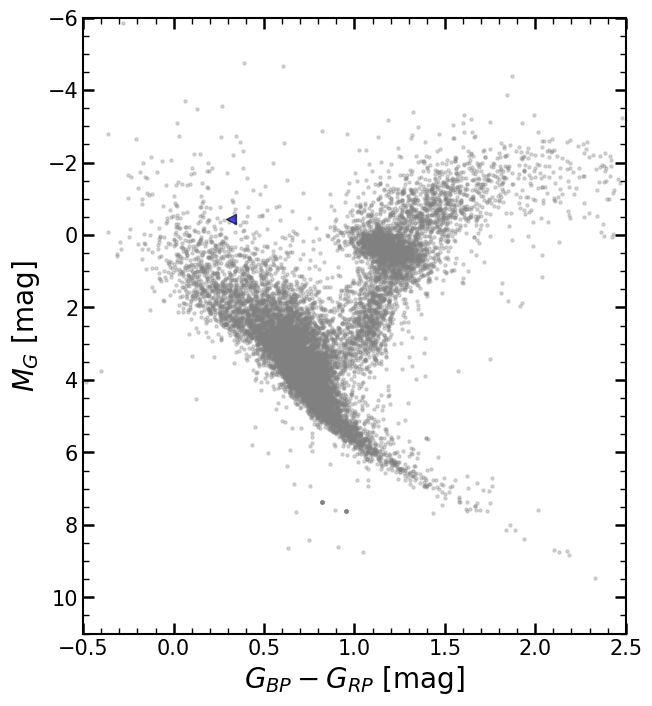

In [45]:
# Plot Single Target CMD
fig, ax = plt.subplots(1, 1, figsize=(7, 8))
ax = plotparams(ax)
ax.scatter(bprp0, Mag0, s=5, color='grey', alpha=0.3)
ax.scatter(bprp1, Mag1, s=5, color='grey', alpha=0.3, label='Stars')
ax.scatter(bprp_J0720, Mag_J0720, s=50, color='b', marker='<', alpha=0.7, edgecolors='black')
ax.invert_yaxis()
ax.set_xlim(-0.5,2.5)
ax.set_ylim(11,-6)
ax.set_xlabel('$G_{BP} - G_{RP}$ [mag]', fontsize=20)
ax.set_ylabel('$M_G$ [mag]', fontsize=20)

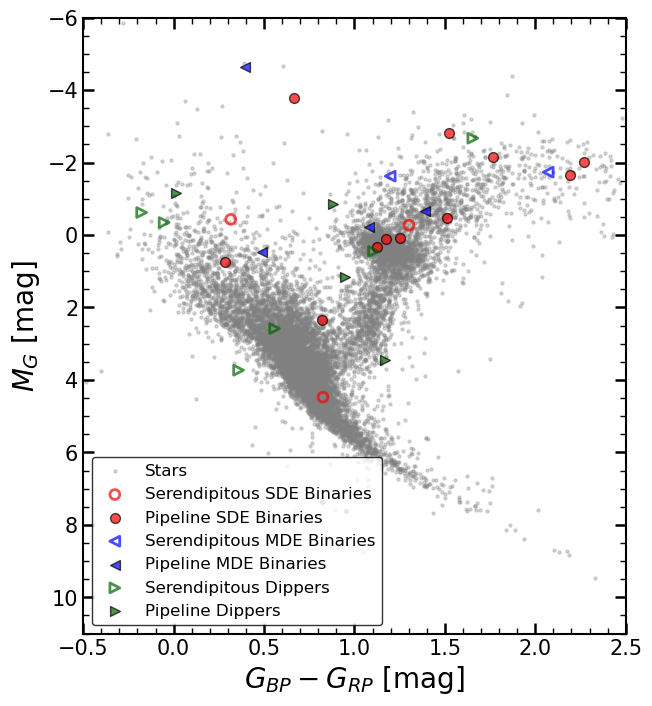

In [46]:
# Plot Full CMD
fig, ax = plt.subplots(1, 1, figsize=(7, 8))
ax = plotparams(ax)
ax.scatter(bprp0, Mag0, s=5, color='grey', alpha=0.3)
ax.scatter(bprp1, Mag1, s=5, color='grey', alpha=0.3, label='Stars')

ax.scatter(Known_SDE_Color, Known_SDE_Mag, s=50, alpha=0.7, linewidth=2, label='Serendipitous SDE Binaries', facecolors='None', edgecolors='red')
ax.scatter(New_SDE_Color, New_SDE_Mag, s=50, color='red', alpha=0.7, label='Pipeline SDE Binaries', edgecolors='black')

ax.scatter(Known_MDE_Color, Known_MDE_Mag, s=50, marker='<', linewidth=2, alpha=0.7, label='Serendipitous MDE Binaries', facecolors='None', edgecolors='blue')
ax.scatter(New_MDE_Color, New_MDE_Mag, s=50, marker='<', color='blue', alpha=0.7, label='Pipeline MDE Binaries', edgecolors='black')

ax.scatter(Known_Dipper_Color, Known_Dipper_Mag, s=50, marker='>', linewidth=2, alpha=0.7, label='Serendipitous Dippers', facecolors='None', edgecolors='darkgreen')
ax.scatter(New_Dipper_Color, New_Dipper_Mag, s=50, marker='>', color='darkgreen', alpha=0.7, label='Pipeline Dippers', edgecolors='black')

ax.invert_yaxis()
ax.set_xlim(-0.5,2.5)
ax.set_ylim(11,-6)
ax.set_xlabel('$G_{BP} - G_{RP}$ [mag]', fontsize=20)
ax.set_ylabel('$M_G$ [mag]', fontsize=20)
ax.legend(fontsize='large',edgecolor='black', loc='lower left')

In [47]:
SDE_Mag = Known_SDE_Mag + New_SDE_Mag
SDE_Color = Known_SDE_Color + New_SDE_Color

MDE_Mag = Known_MDE_Mag + New_MDE_Mag
MDE_Color = Known_MDE_Color + New_MDE_Color

Dipper_Mag = Known_Dipper_Mag + New_Dipper_Mag
Dipper_Color = Known_Dipper_Color + New_Dipper_Color

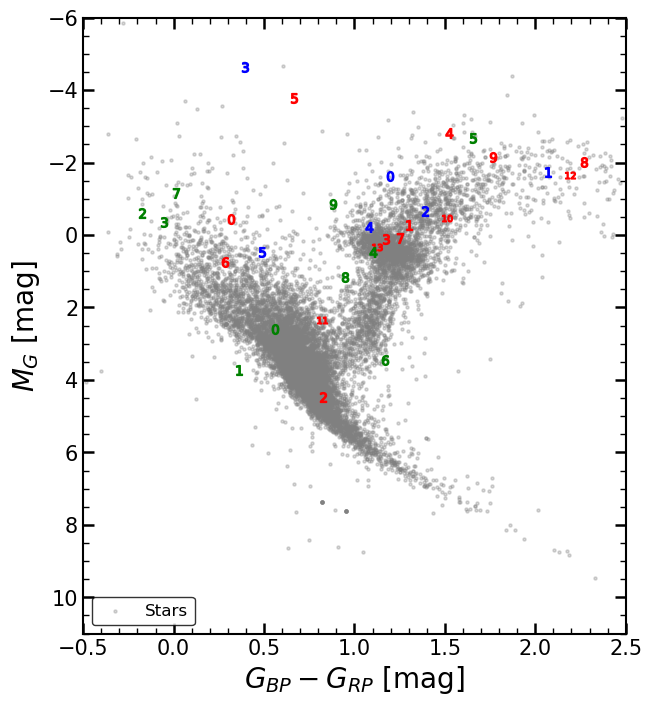

In [48]:
#Plot
fig, ax = plt.subplots(1, 1, figsize=(7, 8))
ax = plotparams(ax)
ax.scatter(bprp0, Mag0, s=5, color='grey', alpha=0.3)
ax.scatter(bprp1, Mag1, s=5, color='grey', alpha=0.3, label='Stars')

for i in range(len(SDE_Color)):
    SDE_marker = '$' + str(i) + '$'
    ax.scatter(SDE_Color[i], SDE_Mag[i], s=50, color='r', marker=SDE_marker)

for i in range(len(MDE_Color)):
    MDE_marker = '$' + str(i) + '$'
    ax.scatter(MDE_Color[i], MDE_Mag[i], s=50, color='b', marker=MDE_marker)

for i in range(len(Dipper_Color)):
    Dipper_marker = '$' + str(i) + '$'
    ax.scatter(Dipper_Color[i], Dipper_Mag[i], s=50, color='g', marker=Dipper_marker)

ax.invert_yaxis()
ax.set_xlim(-0.5,2.5)
ax.set_ylim(11,-6)
ax.set_xlabel('$G_{BP} - G_{RP}$ [mag]', fontsize=20)
ax.set_ylabel('$M_G$ [mag]', fontsize=20)
ax.legend(fontsize='large',edgecolor='black', loc='lower left')

In [49]:
print('SDE #:', len(SDE_Color))
SDE_Miss = [0,1,3,5,6,7,8,9]

print('MDE #:', len(MDE_Color))
MDE_Miss = [1,2,4]

print('Dipper #:', len(Dipper_Color))
Dipper_Miss = [0,2,4,5]

SDE #: 14
MDE #: 6
Dipper #: 10


Text(0, 0.5, '$M_G$ [mag]')

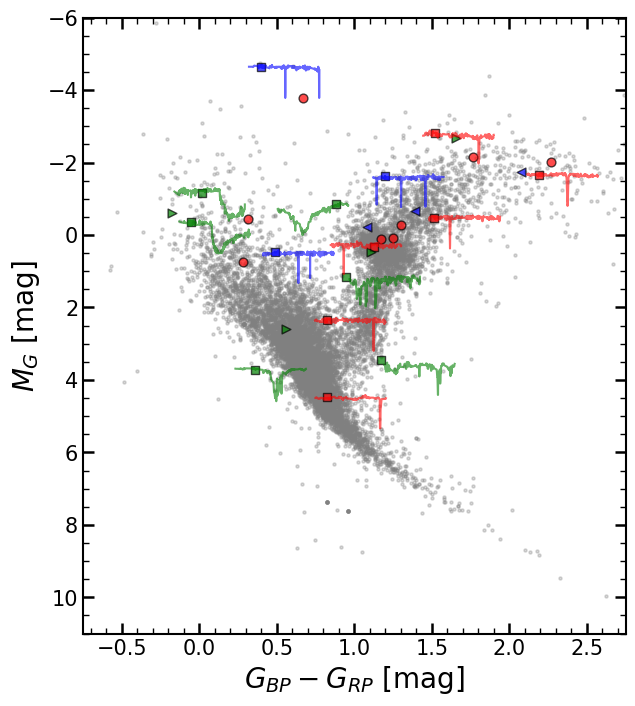

In [50]:
# Market CMD Plot
fig, ax = plt.subplots(1, 1, figsize=(7, 8))
ax = plotparams(ax)
ax.scatter(bprp0, Mag0, s=5, color='grey', alpha=0.3)
ax.scatter(bprp1, Mag1, s=5, color='grey', alpha=0.3, label='Stars')

for i in SDE_Miss:
    ax.scatter(SDE_Color[i], SDE_Mag[i], s=40, color='r', marker='o', edgecolors='black', alpha=0.7)

# J223332+565552 
axin = ax.inset_axes([bprp_J225655-0.1,Mag_J225655-0.1,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J225655g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J225655g['Mag'],size=10),color='r',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J225655,Mag_J225655,s=40,color='r',marker='s',edgecolor='black', alpha=0.7)

# J073924−272916 
axin = ax.inset_axes([bprp_J0727-0.1,Mag_J0727-0.1,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J0727g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J0727g['Mag'],size=10),color='r',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J0727,Mag_J0727,s=40,color='r',marker='s',edgecolor='black', alpha=0.7)

# J190316−195739 
axin = ax.inset_axes([bprp_J1919-0.05,Mag_J1919-0.1,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J1919g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J1919g['Mag'],size=10),color='r',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J1919,Mag_J1919,s=40,color='r',marker='s',edgecolor='black', alpha=0.7)

# J205245−713514 
axin = ax.inset_axes([bprp_J2071-0.1,Mag_J2071-0.1,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J2071g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J2071g['Mag'],size=10),color='r',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J2071,Mag_J2071,s=40,color='r',marker='s',edgecolor='black', alpha=0.7)

# J212132+480140 
axin = ax.inset_axes([bprp_J2148-0.1,Mag_J2148-0.1,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J2148g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J2148g['Mag'],size=10),color='r',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J2148,Mag_J2148,s=40,color='r',marker='s',edgecolor='black', alpha=0.7)

# J225702+562312 
axin = ax.inset_axes([bprp_J225623-0.3,Mag_J225623-0.2,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J225623g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J225623g['Mag'],size=10),color='r',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J225623,Mag_J225623,s=40,color='r',marker='s',edgecolor='black', alpha=0.7)

for i in MDE_Miss:
    ax.scatter(MDE_Color[i], MDE_Mag[i], s=40, color='b', marker='<', edgecolors='black', alpha=0.7)

# J005437+644347 
axin = ax.inset_axes([bprp_J0064-0.1,Mag_J0064-0.1,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J0064g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J0064g['Mag'],size=3),color='b',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J0064,Mag_J0064,s=40,color='b',marker='s',edgecolor='black', alpha=0.7)

# J124745−622756 
axin = ax.inset_axes([bprp_J1262-0.1,Mag_J1262-0.1,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J1262g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J1262g['Mag'],size=10),color='b',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J1262,Mag_J1262,s=40,color='b',marker='s',edgecolor='black', alpha=0.7)

# J175912−120956 
axin = ax.inset_axes([bprp_J1712-0.1,Mag_J1712-0.1,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J1712g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J1712g['Mag'],size=3),color='b',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J1712,Mag_J1712,s=40,color='b',marker='s',edgecolor='black', alpha=0.7)

for i in Dipper_Miss:
    ax.scatter(Dipper_Color[i], Dipper_Mag[i], s=40, color='g', marker='>', edgecolors='black', alpha=0.7)

# J081523−385923
axin = ax.inset_axes([bprp_J0838-0.15,Mag_J0838-0.1,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J0838g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J0838g['Mag'],size=10),color='g',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J0838,Mag_J0838,s=40,color='g',marker='s',edgecolor='black', alpha=0.7)

# J114712−621057
axin = ax.inset_axes([bprp_J1162-0.1,Mag_J1162-0.1,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J1162g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J1162g['Mag'],size=10),color='g',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J1162,Mag_J1162,s=40,color='g',marker='s',edgecolor='black', alpha=0.7)

# J042214+152530
axin = ax.inset_axes([bprp_J0415-0,Mag_J0415-0,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J0415g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J0415g['Mag'],size=10),color='g',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J0415,Mag_J0415,s=40,color='g',marker='s',edgecolor='black', alpha=0.7)

# J080327−261620
axin = ax.inset_axes([bprp_J0826-0.2,Mag_J0826-0.2,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J0826g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J0826g['Mag'],size=10),color='g',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J0826,Mag_J0826,s=40,color='g',marker='s',edgecolor='black', alpha=0.7)

# J174328+343315
axin = ax.inset_axes([bprp_J1734-0,Mag_J1734-0.1,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J1734g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J1734g['Mag'],size=10),color='g',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J1734,Mag_J1734,s=40,color='g',marker='s',edgecolor='black', alpha=0.7)

# J202402+383938
axin = ax.inset_axes([bprp_J2038-0.4,Mag_J2038-0.1,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J2038g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J2038g['Mag'],size=10),color='g',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J2038,Mag_J2038,s=40,color='g',marker='s',edgecolor='black', alpha=0.7)

ax.invert_yaxis()
ax.set_xlim(-0.75,2.75)
ax.set_ylim(11,-6)
ax.set_xlabel('$G_{BP} - G_{RP}$ [mag]', fontsize=20)
ax.set_ylabel('$M_G$ [mag]', fontsize=20)
#ax.legend(fontsize='large',edgecolor='black', loc='lower left')